# Task-1 Titanic Survival Prediction

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
titanic_data= pd.read_csv('tested.csv')

In [3]:
titanic_data

PassengerId  Survived  Pclass   
0            892         0       3  \
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch   
0                                Kelly, Mr. James    male  34.5      0      0  \
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                                            ...     ...   ...    ...    ...   
413                            Spector, Mr. Woolf    male   NaN      0      0   
414                  Oliva y Ocana, Dona. Fermina  female  39.0      0      0   
415                  Saether, Mr. Simon Sivertsen    male  38.5      0      0   
416                           Ware, Mr. Frederick    male   NaN      0      0   
417                      Peter, Master. Michael J    male   NaN      1      1   

                 Ticket      Fare Cabin Embarked  
0                330911    7.8292   NaN        Q  
1                363272    7.0000   NaN        S  
2                240276    9.6875   NaN        Q  
3                315154    8.6625   NaN        S  
4               3101298   12.2875   NaN        S  
..                  ...       ...   ...      ...  
413           A.5. 3236    8.0500   NaN        S  
414            PC 17758  108.9000  C105        C  
415  SOTON/O.Q. 3101262    7.2500   NaN        S  
416              359309    8.0500   NaN        S  
417                2668   22.3583   NaN        C  

[418 rows x 12 columns]

## Exploratory Data Analysis


In [4]:
titanic_data.isnull()

PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket   
0          False     False   False  False  False  False  False  False   False  \
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
413        False     False   False  False  False   True  False  False   False   
414        False     False   False  False  False  False  False  False   False   
415        False     False   False  False  False  False  False  False   False   
416        False     False   False  False  False   True  False  False   False   
417        False     False   False  False  False   True  False  False   False   

      Fare  Cabin  Embarked  
0    False   True     False  
1    False   True     False  
2    False   True     False  
3    False   True     False  
4    False   True     False  
..     ...    ...       ...  
413  False   True     False  
414  False  False     False  
415  False   True     False  
416  False   True     False  
417  False   True     False  

[418 rows x 12 columns]

<AxesSubplot: >

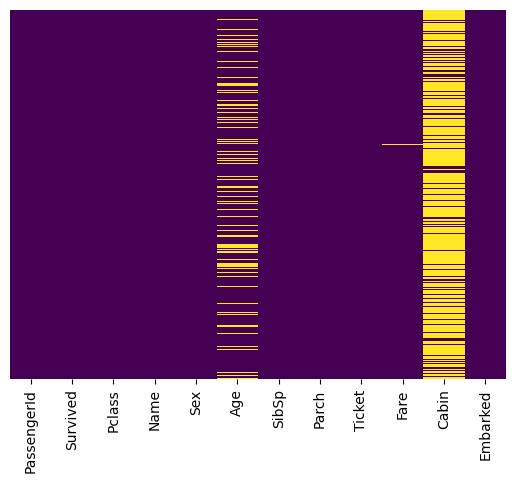

In [5]:
sns.heatmap(titanic_data.isnull(),yticklabels=False ,cbar=False,cmap='viridis')

<AxesSubplot: xlabel='Survived', ylabel='count'>

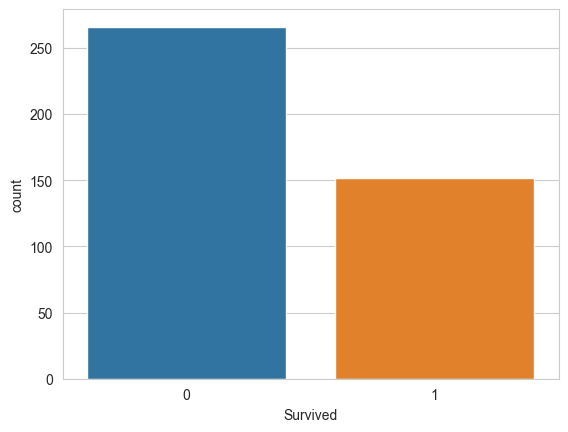

In [6]:
sns.set_style("whitegrid")
sns.countplot(x='Survived',data = titanic_data)

<AxesSubplot: xlabel='Survived', ylabel='count'>

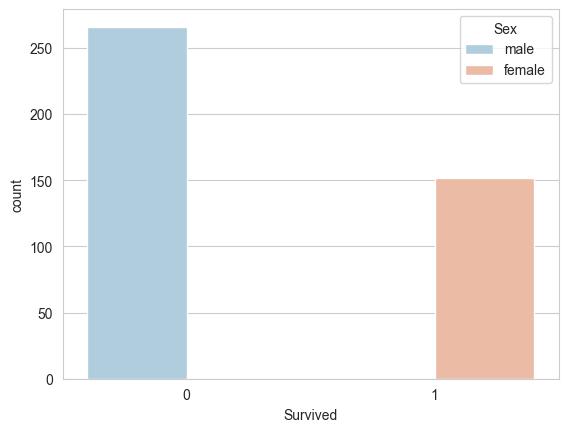

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex' ,data=titanic_data ,palette='RdBu_r')

<AxesSubplot: xlabel='Survived', ylabel='count'>

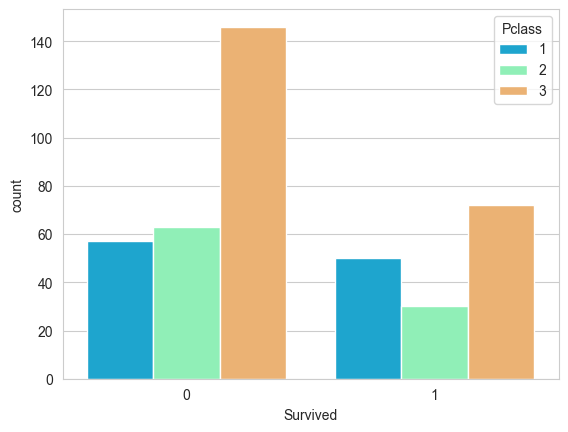

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=titanic_data,palette='rainbow')

<AxesSubplot: >

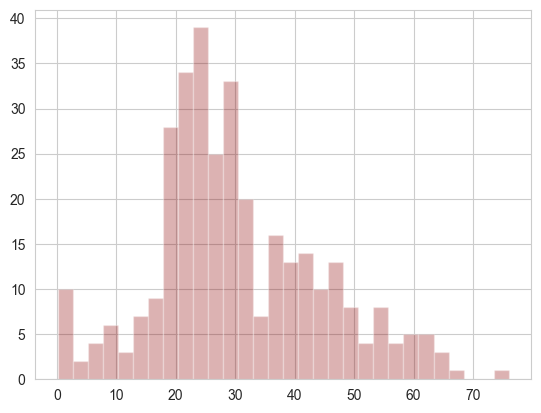

In [9]:
titanic_data['Age'].hist(bins=30,color='darkred',alpha=0.3)

<AxesSubplot: xlabel='SibSp', ylabel='count'>

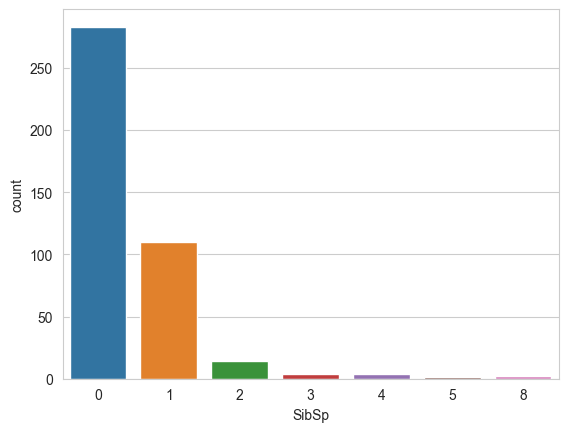

In [10]:
sns.countplot(x='SibSp',data=titanic_data)

<AxesSubplot: >

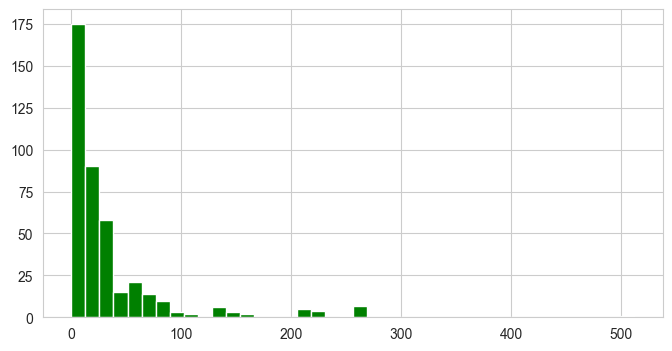

In [11]:
titanic_data['Fare'].hist(color='green',bins=40,figsize=(8,4))

## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). However we can be smarter about this and check the average age by passenger class. For example:

<AxesSubplot: xlabel='Pclass', ylabel='Age'>

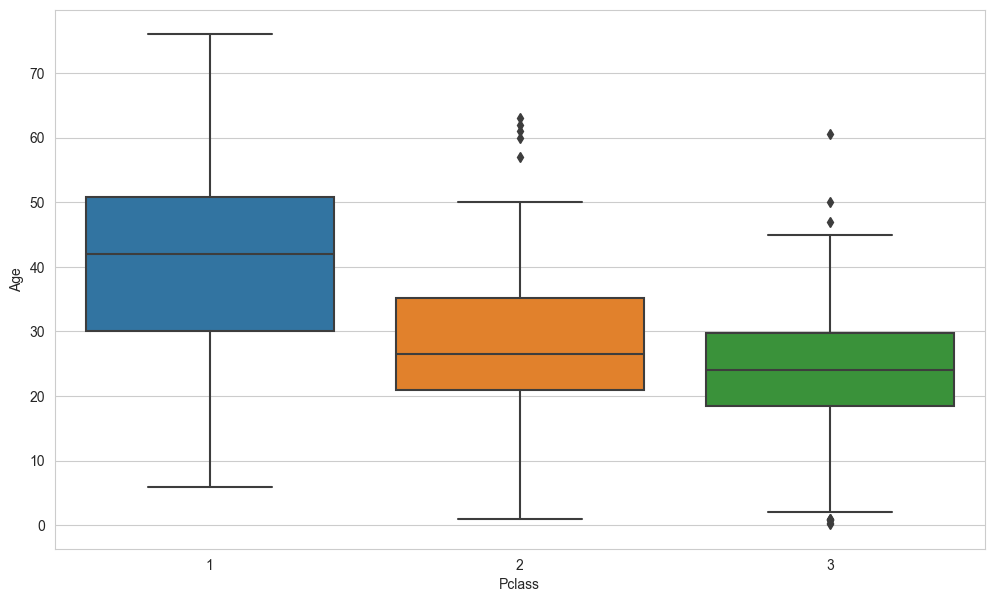

In [12]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=titanic_data)

In [13]:
def cal_age(col):
    Age=col[0]
    Pclass=col[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 42
        elif Pclass == 2:
            return 27
        else :
            return 25
    else:
        return Age

Now Apply that function!

In [14]:
titanic_data['Age'] = titanic_data[['Age','Pclass']].apply(cal_age,axis=1)

Now let's check the heap map again!

<AxesSubplot: >

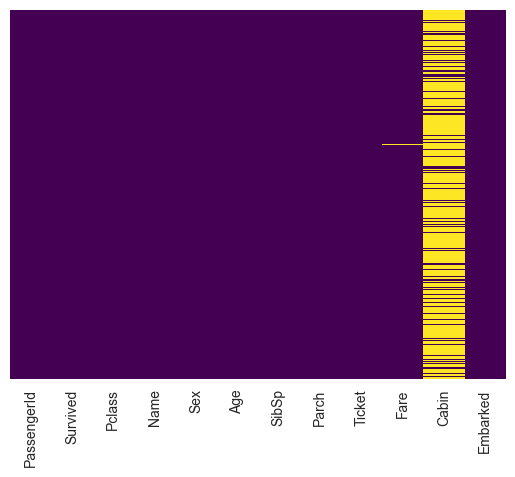

In [15]:
sns.heatmap(titanic_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [16]:
titanic_data.head()

PassengerId  Survived  Pclass   
0          892         0       3  \
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch   
0                              Kelly, Mr. James    male  34.5      0      0  \
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S

In [17]:
titanic_data.drop('Cabin',axis=1,inplace=True)

In [18]:
titanic_data.head()

PassengerId  Survived  Pclass   
0          892         0       3  \
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch   
0                              Kelly, Mr. James    male  34.5      0      0  \
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Embarked  
0   330911   7.8292        Q  
1   363272   7.0000        S  
2   240276   9.6875        Q  
3   315154   8.6625        S  
4  3101298  12.2875        S

In [19]:
titanic_data.dropna(inplace=True)

## Converting  Categorical Data

In [20]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Survived     417 non-null    int64  
 2   Pclass       417 non-null    int64  
 3   Name         417 non-null    object 
 4   Sex          417 non-null    object 
 5   Age          417 non-null    float64
 6   SibSp        417 non-null    int64  
 7   Parch        417 non-null    int64  
 8   Ticket       417 non-null    object 
 9   Fare         417 non-null    float64
 10  Embarked     417 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 39.1+ KB


In [21]:
sex=pd.get_dummies(titanic_data['Sex'],drop_first=True)
embark=pd.get_dummies(titanic_data['Embarked'],drop_first=True)

In [22]:
titanic_data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [23]:
titanic_data.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0          892         0       3  34.5      0      0   7.8292
1          893         1       3  47.0      1      0   7.0000
2          894         0       2  62.0      0      0   9.6875
3          895         0       3  27.0      0      0   8.6625
4          896         1       3  22.0      1      1  12.2875

In [24]:
titanic_data = pd.concat([titanic_data,sex,embark],axis=1)

In [25]:
titanic_data.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare   male      Q   
0          892         0       3  34.5      0      0   7.8292   True   True  \
1          893         1       3  47.0      1      0   7.0000  False  False   
2          894         0       2  62.0      0      0   9.6875   True   True   
3          895         0       3  27.0      0      0   8.6625   True  False   
4          896         1       3  22.0      1      1  12.2875  False  False   

       S  
0  False  
1   True  
2  False  
3   True  
4   True

In [26]:
def conv_toint(col):
    value=col
    
    if value==True:
        return 1
    else :
        return 0

In [27]:
titanic_data['male']=titanic_data['male'].apply(conv_toint)
titanic_data['Q']=titanic_data['Q'].apply(conv_toint)
titanic_data['S']=titanic_data['S'].apply(conv_toint)
titanic_data.head()


PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0          892         0       3  34.5      0      0   7.8292     1  1  0
1          893         1       3  47.0      1      0   7.0000     0  0  1
2          894         0       2  62.0      0      0   9.6875     1  1  0
3          895         0       3  27.0      0      0   8.6625     1  0  1
4          896         1       3  22.0      1      1  12.2875     0  0  1

In [28]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Survived     417 non-null    int64  
 2   Pclass       417 non-null    int64  
 3   Age          417 non-null    float64
 4   SibSp        417 non-null    int64  
 5   Parch        417 non-null    int64  
 6   Fare         417 non-null    float64
 7   male         417 non-null    int64  
 8   Q            417 non-null    int64  
 9   S            417 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 35.8 KB


Great! Our data is ready for our model!

## Building a Logistic Regression model

### Train Test Split

In [29]:
titanic_data.drop('Survived',axis=1).head()

PassengerId  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0          892       3  34.5      0      0   7.8292     1  1  0
1          893       3  47.0      1      0   7.0000     0  0  1
2          894       2  62.0      0      0   9.6875     1  1  0
3          895       3  27.0      0      0   8.6625     1  0  1
4          896       3  22.0      1      1  12.2875     0  0  1

In [30]:
titanic_data['Survived'].head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(titanic_data.drop('Survived',axis=1),
                                                    titanic_data['Survived'],test_size=0.30,
                                                    random_state=101)

## Training & Predicting

In [33]:
from sklearn.linear_model import LogisticRegression

In [41]:
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
predictions = logmodel.predict(X_test)

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
accuracy = confusion_matrix(y_test,predictions)

In [38]:
accuracy

array([[65,  0],
       [ 0, 61]], dtype=int64)

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
accuracy = accuracy_score(y_test,predictions)
accuracy

1.0

## Thank You.